In [24]:
# declare the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  

In [25]:
# read the data
df = pd.read_csv("house_prices_dataset.csv")

# display the first 5 rows of the data
print(df.head())

   sqft (1000s)  price (1000$)
0         2.234      24.015334
1         0.970      20.220336
2         0.518       6.798509
3         2.625      30.543294
4         2.980      51.810683


In [ ]:
# x_train is the input variable (size in 1000 square feet)
# y_train is the target (price in 1000s of dollars)
# convert the data to numpy arrays for easier cleaning process using numpy
x_train = df['sqft (1000s)'].to_numpy()
y_train = df['price (1000$)'].to_numpy()
print(type(x_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


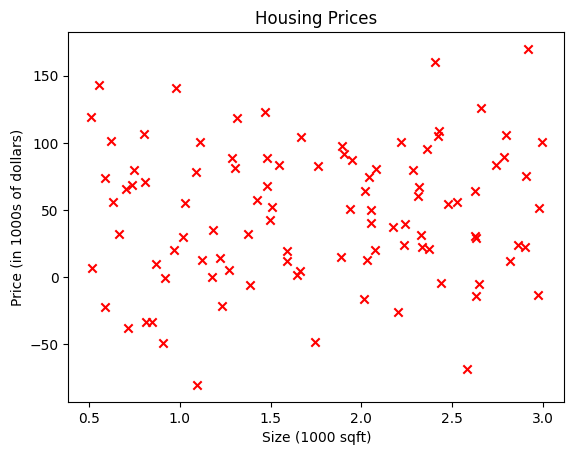

In [29]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()

In [30]:
#function to clean the data

def clean_unusual_price(x, y):
    """
    Clear unusual prices in the input dataset
    There are some unusual prices in the dataset that are not realistic
    This function removes these prices
    When removing the prices, the corresponding size is also removed to avoid mismatch and to be able to plot the data again
    Args:
      x (ndarray (m,)): Data, m examples 
    """

    m = x.shape[0]

    # create a boolean to filter out the unusual values
    clean = y > 0
    # store the suitable values after cleaning
    x = x[clean]
    y = y[clean]
    return x, y

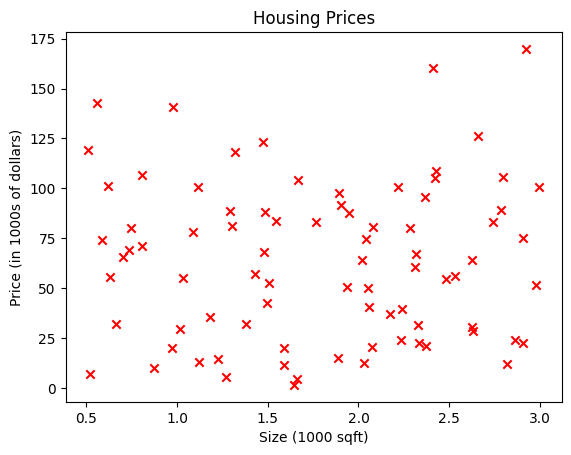

In [31]:
# Clean the data
x_train, y_train = clean_unusual_price(x_train, y_train)


# Plot the data points again to see if there still any unusual values
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()

In [35]:
# convert the cleaned data to DataFrame for easier saving process
df = pd.DataFrame({"sqft (1000s)": x_train, "price (1000$)": y_train})

# Save as CSV file
# This csv file will be saved in the same folder with this 'cleaning' file
# This file will be used for the new 'expreiment' on old/new model
# The index in this dataset is not necessary, so I remove it for easier post-testing process on old/new model
df.to_csv("house_prices_dataset_cleaned.csv", index=False)